# Single-Shot CNN Denoising

We demonstrate that a deep neural net can be trained to denoise a _single_ noisy image, taking advantage of the fact that one 512 x 512 image contains ~250,000 dimensions of information.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline


In [2]:
import sys
sys.path.append("..")


In [3]:
from util import show, plot_images, plot_tensors

c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import disk
from skimage.filters import gaussian, median
from skimage import data, img_as_float, img_as_ubyte
from skimage.color import gray2rgb
from skimage.util import random_noise
from skimage.metrics import peak_signal_noise_ratio as psnr


from skimage.io import imread, imshow_collection
from skimage import data
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
plt.rc('figure', figsize = (5,5))

(733, 733)
[[  6  10  36 ...   8  44  22]
 [ 40  34  44 ... 112  19  44]
 [  4  42   7 ...  54  89  39]
 ...
 [ 87  24  22 ... 185 129 255]
 [ 58  43  55 ... 120 158 255]
 [ 25  89 126 ... 255  73   7]]


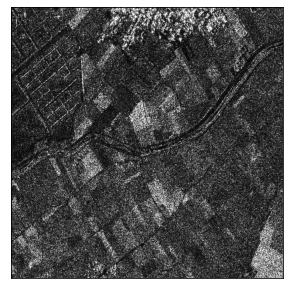

In [6]:
import cv2
from PIL import Image
#path = "D:/noise2self-master/noise2self-master/sar_data"
# 이미지 읽기
img_gray = cv2.imread("../sar_data/noisy_sample.png")

# 컬러 이미지를 그레이스케일로 변환
img_cv_gray = cv2.cvtColor(img_gray, cv2.COLOR_BGR2GRAY)
show(img_cv_gray)
print(img_cv_gray.shape)
print(img_cv_gray)

# 이미지 저장
#cv2.imwrite(path, img_cv_gray)
#cv2.imwrite("D:/noise2self-master/noise2self-master/ddiirr", img_cv_gray)
# 이미지 사이즈 변경
# img_gray_resize = cv2.resize(img_cv_gray, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)  # 가로, 세로 모두 반으로 줄이기
# img_gray_reduced = cv2.resize(img_cv_gray, None, interpolation=cv2.INTER_AREA)

# 이미지 화면으로 보기
# cv2.imshow('color', img_gray)  # color라는 이름의 윈도우 안에 img_gray 이미지 보여주기
# cv2.imshow('gray-scale', img_gray_resize)
# cv2.imshow('gray-scale reduced', img_gray_reduced)



# Normalization

[[  6  10  36 ...   8  44  22]
 [ 40  34  44 ... 112  19  44]
 [  4  42   7 ...  54  89  39]
 ...
 [ 87  24  22 ... 185 129 255]
 [ 58  43  55 ... 120 158 255]
 [ 25  89 126 ... 255  73   7]]


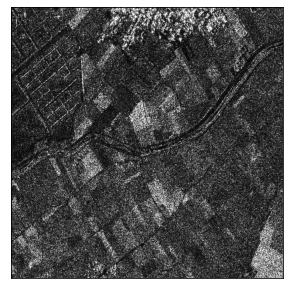

In [35]:
img_norm = cv2.normalize(img_cv_gray, None, 0, 255, cv2.NORM_MINMAX)
# img_norm = cv2.normalize(img_cv_gray, None, 0, 1, cv2.NORM_MINMAX)
show(img_norm)
print(img_norm)

In [36]:
np.where((img_cv_gray == img_norm) == False)

(array([], dtype=int64), array([], dtype=int64))

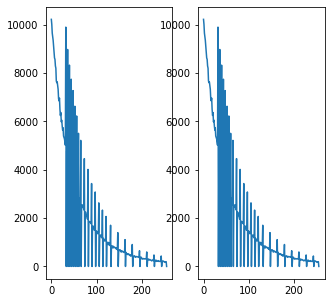

In [37]:
cv2.waitKey(0)
cv2.destroyAllWindows()

hist = cv2.calcHist([img_cv_gray], [0], None, [256], [0, 255])
hist_norm = cv2.calcHist([img_norm], [0], None, [256], [0, 255])

for i, h in enumerate([hist, hist_norm]):
    plt.subplot(1,2,i+1)
    plt.plot(h)
plt.show()

In [39]:
img_norm = np.uint8(img_norm)
# denoised_img = cv2.fastNlMeansDenoisingColored(img_norm, None, 15, 15, 5, 10)
denoised_img = cv2.fastNlMeansDenoising(img_norm, None, 15, 15, 5, 10)

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\photo\src\denoising.cpp:120: error: (-215:Assertion failed) hn == 1 || hn == cn in function 'cv::fastNlMeansDenoising'


# Equalization

[[ 27  44 122 ...  36 138  84]
 [130 115 138 ... 209  75 138]
 [ 19 132  32 ... 153 194 126]
 ...
 [191  90  84 ... 234 218 255]
 [159 134 154 ... 213 228 255]
 [ 93 194 216 ... 255 179  32]]


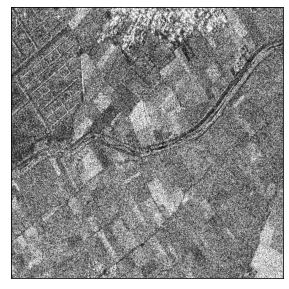

In [17]:
img_equalized = cv2.equalizeHist(img_cv_gray)
show(img_equalized)
print(img_equalized)

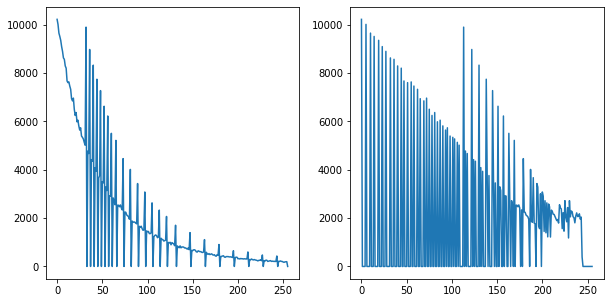

In [19]:
cv2.waitKey(0)
cv2.destroyAllWindows()

hist = cv2.calcHist([img_cv_gray], [0], None, [256], [0, 255])
hist_equalized = cv2.calcHist([img_equalized], [0], None, [256], [0, 255])

plt.figure(figsize=(10,5))
for i, h in enumerate([hist, hist_equalized]):
    plt.subplot(1,2,i+1)
    plt.plot(h)
plt.show()

(800, 800)
[[0.02970084 0.04139257 0.12169228 ... 0.07357444 0.15857498 0.0931768 ]
 [0.13933375 0.1238468  0.15874669 ... 0.32492619 0.09623338 0.15857498]
 [0.04997246 0.14395518 0.07883253 ... 0.2661201  0.27464786 0.16267865]
 ...
 [0.30866998 0.1358038  0.11260547 ... 0.64229956 0.58877587 0.98030592]
 [0.21036013 0.19378971 0.23823258 ... 0.54560401 0.61543174 0.86525723]
 [0.11342489 0.31156601 0.452938   ... 0.83595879 0.27108076 0.07789383]]


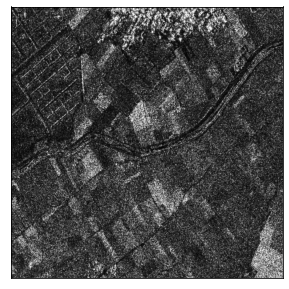

In [7]:

from skimage.transform import resize
img_resize = resize(img_cv_gray, (800,800))
show(img_resize)
print(img_resize.shape)
print(img_resize)


In [8]:
test_arr = np.array(img_resize)
print(test_arr)
print('\n\n', 1+test_arr*-1)
rs_arr = 1+test_arr*-1

[[0.02970084 0.04139257 0.12169228 ... 0.07357444 0.15857498 0.0931768 ]
 [0.13933375 0.1238468  0.15874669 ... 0.32492619 0.09623338 0.15857498]
 [0.04997246 0.14395518 0.07883253 ... 0.2661201  0.27464786 0.16267865]
 ...
 [0.30866998 0.1358038  0.11260547 ... 0.64229956 0.58877587 0.98030592]
 [0.21036013 0.19378971 0.23823258 ... 0.54560401 0.61543174 0.86525723]
 [0.11342489 0.31156601 0.452938   ... 0.83595879 0.27108076 0.07789383]]


 [[0.97029916 0.95860743 0.87830772 ... 0.92642556 0.84142502 0.9068232 ]
 [0.86066625 0.8761532  0.84125331 ... 0.67507381 0.90376662 0.84142502]
 [0.95002754 0.85604482 0.92116747 ... 0.7338799  0.72535214 0.83732135]
 ...
 [0.69133002 0.8641962  0.88739453 ... 0.35770044 0.41122413 0.01969408]
 [0.78963987 0.80621029 0.76176742 ... 0.45439599 0.38456826 0.13474277]
 [0.88657511 0.68843399 0.547062   ... 0.16404121 0.72891924 0.92210617]]


(800, 800)


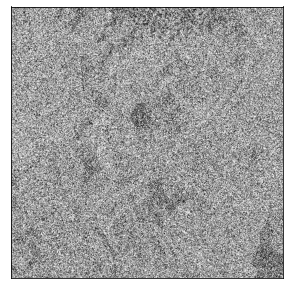

In [9]:
# np.random.seed(3)
# noisy_image = random_noise(img_resize, mode = 'gaussian', var=1)
noisy_image = random_noise(rs_arr, mode = 'gaussian', var=1)        # test 
show(noisy_image)
print(noisy_image.shape)

In [10]:
import torch
noisy = torch.Tensor(noisy_image[np.newaxis, np.newaxis])

In [57]:
noisy.shape

torch.Size([1, 1, 800, 800])

In [58]:
# ---- GPU
# from util import getbestgpu
# device = getbestgpu()

# Masking

The strategy is to train a $J$-invariant version of a neural net by replacing a grid of pixels with the average of their neighbors, then only evaluating the model on the masked pixels.

In [59]:
from mask import Masker
masker = Masker(width = 4, mode='interpolate')
# masker = Masker(width = 4, mode='zero')

In [60]:
masker

# Model

For our model, we use a deep convolutional network.

In [32]:
torch.manual_seed(3)
from models.dncnn import DnCNN
model = DnCNN(1, num_of_layers = 5)

In [33]:
sum(p.numel() for p in model.parameters() if p.requires_grad)

112128

In [34]:
noisy_image.ravel().shape

(640000,)

# Training

In [35]:
from torch.nn import MSELoss, L1Loss
from torch.optim import Adam

loss_function = MSELoss()
optimizer = Adam(model.parameters(), lr=0.02)

In [36]:
# ------ GPU
# model = model.to(device)
# noisy = noisy.to(device)

In [37]:
losses = []
val_losses = []
best_images = []
best_val_loss = 1

for i in range(100):
    model.train()
    
    net_input, mask = masker.mask(noisy, i % (masker.n_masks - 1))
    net_output = model(net_input)
    
    loss = loss_function(net_output*mask, noisy*mask)
    optimizer.zero_grad()
 
    loss.backward()
    
    optimizer.step()
    
    if i % 10 == 0:
        losses.append(loss.item())
        model.eval()
        
        net_input, mask = masker.mask(noisy, masker.n_masks - 1)
        net_output = model(net_input)
    
        val_loss = loss_function(net_output*mask, noisy*mask)
        
        val_losses.append(val_loss.item())
        
        print("(", i, ") Loss: \t", round(loss.item(), 5), "\tVal Loss: \t", round(val_loss.item(), 5))

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            denoised = np.clip(model(noisy).detach().cpu().numpy()[0, 0], 0, 1).astype(np.float64)
            best_psnr = psnr(denoised, noisy_image)
            best_images.append(denoised)
            print("\tModel PSNR: ", np.round(best_psnr, 2))

( 0 ) Loss: 	 0.0116 	Val Loss: 	 0.23901
	Model PSNR:  6.73
( 10 ) Loss: 	 0.03351 	Val Loss: 	 2.02377
( 20 ) Loss: 	 0.00441 	Val Loss: 	 0.08213
	Model PSNR:  13.53
( 30 ) Loss: 	 0.00302 	Val Loss: 	 0.0279
	Model PSNR:  14.29
( 40 ) Loss: 	 0.00151 	Val Loss: 	 0.00162
	Model PSNR:  17.62
( 50 ) Loss: 	 0.00072 	Val Loss: 	 0.0016
	Model PSNR:  16.49
( 60 ) Loss: 	 0.00067 	Val Loss: 	 0.00076
	Model PSNR:  19.77
( 70 ) Loss: 	 0.00059 	Val Loss: 	 0.00059
	Model PSNR:  20.64
( 80 ) Loss: 	 0.00057 	Val Loss: 	 0.00075
( 90 ) Loss: 	 0.00053 	Val Loss: 	 0.00074


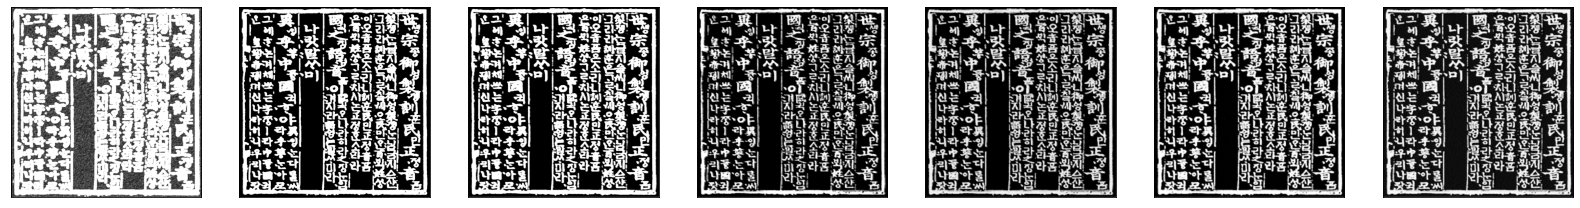

In [38]:
import os 
path = r'..\sar_data/test2'.replace('\\', '/', 10)
plot_images(best_images)
plt.savefig(f'{path}/plot_images')


In [39]:
denoised = best_images[-1]

In [40]:
psnr(denoised, noisy_image)

20.63993617108663

In [41]:
inset_x_min = 10
inset_x_max = 170
inset_y_min = 90
inset_y_max = 220

get_inset = lambda x: x[inset_x_min:inset_x_max, inset_y_min:inset_y_max]

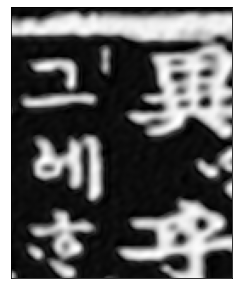

In [42]:
show(get_inset(denoised))
plt.savefig(f'{path}/enlarge')

In [43]:
inset_x_min = 10
inset_x_max = 600
inset_y_min = 10
inset_y_max = 600

get_inset = lambda x: x[inset_x_min:inset_x_max, inset_y_min:inset_y_max]

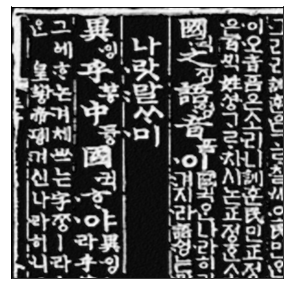

In [44]:
show(get_inset(denoised))
plt.savefig(f'{path}/best')

In [45]:
inset_x_min = 0
inset_x_max = 800
inset_y_min = 0
inset_y_max = 800

get_inset = lambda x: x[inset_x_min:inset_x_max, inset_y_min:inset_y_max]

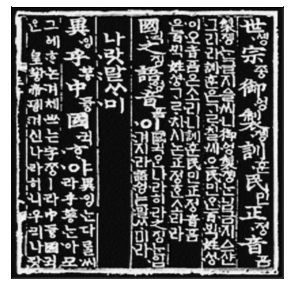

In [46]:
show(get_inset(denoised))
plt.savefig(f'{path}/best')

# Test !!!!!!!!!!!!!!!!

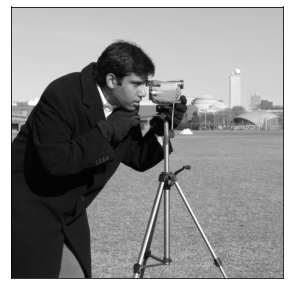

In [21]:
plt.rc('figure', figsize = (5,5))
image = img_as_float(data.camera())
show(image)

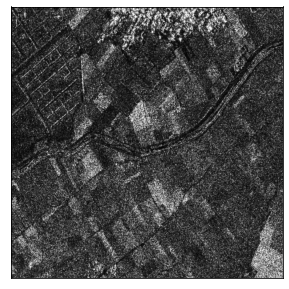

In [27]:
np.random.seed(3)
# noisy_image = random_noise(image, mode = 'gaussian', var=0.01)
img_gray = cv2.imread(os.path.join(r'C:\Users\ADMIN\Desktop\SAR_image\noise2self\noise2self-master\sar_data', 'noisy_sample.png'))
img_cv_gray = cv2.cvtColor(img_gray, cv2.COLOR_BGR2GRAY)
img_resize = resize(img_cv_gray, (800, 800))
noisy_image = cv2.normalize(img_resize, None, 0, 255, cv2.NORM_MINMAX)
show(noisy_image)

In [13]:
noisy = torch.Tensor(noisy_image[np.newaxis, np.newaxis])

In [15]:
from mask import Masker
masker = Masker(width = 4, mode='interpolate')

In [16]:
torch.manual_seed(3)
from models.dncnn import DnCNN
model = DnCNN(1, num_of_layers = 8)

In [17]:
sum(p.numel() for p in model.parameters() if p.requires_grad)

223104

In [18]:
image.ravel().shape

(262144,)

In [20]:
from torch.nn import MSELoss, L1Loss
from torch.optim import Adam

loss_function = MSELoss()
optimizer = Adam(model.parameters(), lr=0.01)

In [28]:
from skimage.metrics import peak_signal_noise_ratio as compare_psnr

losses = []
val_losses = []
best_images = []
best_val_loss = 1

for i in range(500):
    model.train()
    
    net_input, mask = masker.mask(noisy, i % (masker.n_masks - 1))
    net_output = model(net_input)
    
    loss = loss_function(net_output*mask, noisy*mask)
    optimizer.zero_grad()
 
    loss.backward()
    
    optimizer.step()
    
    if i % 10 == 0:
        losses.append(loss.item())
        model.eval()
        
        net_input, mask = masker.mask(noisy, masker.n_masks - 1)
        net_output = model(net_input)
    
        val_loss = loss_function(net_output*mask, noisy*mask)
        
        val_losses.append(val_loss.item())
        
        print("(", i, ") Loss: \t", round(loss.item(), 5), "\tVal Loss: \t", round(val_loss.item(), 5))

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            denoised = np.clip(model(noisy).detach().cpu().numpy()[0, 0], 0, 1).astype(np.float64)
            best_psnr = compare_psnr(denoised, image)
            best_images.append(denoised)
            print("\tModel PSNR: ", np.round(best_psnr, 2))

( 0 ) Loss: 	 0.14527 	Val Loss: 	 0.03649


ValueError: Input images must have the same dimensions.